In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import Image as IPImage, display, HTML
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Paths
RESULTS_DIR = Path("../results")
SAMPLE_IMAGES_DIR = RESULTS_DIR / "sample_images"


In [3]:
# Load inference results
with open(RESULTS_DIR / "inference_results.json", 'r') as f:
    results = json.load(f)

with open(RESULTS_DIR / "performance_metrics.json", 'r') as f:
    performance = json.load(f)

print(f"📊 Loaded results for {results['summary']['total_images']} images")
print(f"🎯 Model: {Path(results['model_info']['model_path']).name}")
print(f"⏰ Test run: {results['model_info']['timestamp']}")
print(f"🎚️ Confidence threshold: {results['model_info']['confidence_threshold']}")
print(f"🏷️ Model classes: {results['model_info']['model_classes']}")

# Quick stats
detection_rate = performance['detection_rate']
avg_confidence = performance['confidence_stats']['mean']
avg_time = performance['timing_stats']['avg_inference_time']

print(f"\n📈 Quick Stats:")
print(f"   Detection Rate: {detection_rate:.1%}")
print(f"   Avg Confidence: {avg_confidence:.3f}")
print(f"   Avg Inference Time: {avg_time:.3f}s ({1/avg_time:.1f} FPS)")


📊 Loaded results for 50 images
🎯 Model: weights.pt
⏰ Test run: 2025-06-25 20:53:39
🎚️ Confidence threshold: 0.25
🏷️ Model classes: ['container-number']

📈 Quick Stats:
   Detection Rate: 68.0%
   Avg Confidence: 0.835
   Avg Inference Time: 0.083s (12.0 FPS)


In [4]:
# Separate success and failure cases
successful_images = [img for img in results['images'] if img['num_detections'] > 0]
failed_images = [img for img in results['images'] if img['num_detections'] == 0]

print(f"✅ Successful detections: {len(successful_images)} ({len(successful_images)/len(results['images']):.1%})")
print(f"❌ Failed detections: {len(failed_images)} ({len(failed_images)/len(results['images']):.1%})")

# Analyze successful cases
if successful_images:
    success_confidences = []
    success_times = []
    for img in successful_images:
        success_times.append(img['inference_time'])
        for det in img['detections']:
            success_confidences.append(det['confidence'])
    
    print(f"\n📊 Success Case Analysis:")
    print(f"   Avg confidence: {np.mean(success_confidences):.3f}")
    print(f"   Confidence range: {np.min(success_confidences):.3f} - {np.max(success_confidences):.3f}")
    print(f"   Avg inference time: {np.mean(success_times):.3f}s")

# Analyze failure cases
if failed_images:
    fail_times = [img['inference_time'] for img in failed_images]
    print(f"\n📊 Failure Case Analysis:")
    print(f"   Avg inference time: {np.mean(fail_times):.3f}s")
    print(f"   Failed filenames (first 10): {[img['filename'] for img in failed_images[:10]]}")


✅ Successful detections: 34 (68.0%)
❌ Failed detections: 16 (32.0%)

📊 Success Case Analysis:
   Avg confidence: 0.835
   Confidence range: 0.274 - 0.954
   Avg inference time: 0.066s

📊 Failure Case Analysis:
   Avg inference time: 0.120s
   Failed filenames (first 10): ['ECMU6635958.jpg', 'HLBU3679060.jpg', 'OOCU7513794.jpg', 'MSKU3507247.jpg', 'HLBU4128951.jpg', 'CCLU5191215.jpg', 'TLLU5586138.jpg', 'NYKU4707428.jpg', 'CICU2078827.jpg', 'MSDU2523654.jpg']



🎯 TOP SUCCESSFUL DETECTIONS (Highest Confidence)

📷 MNBU3419062.jpg (Expected: MNBU3419062)
   Detection 1: container-number (confidence: 0.954)
   Bounding box: [58, 243, 224, 273]
   Inference time: 0.097s
   ⚠️ Annotated image not found: ../results/sample_images/annotated_MNBU3419062.jpg

📷 CSNU8509782.jpg (Expected: CSNU8509782)
   Detection 1: container-number (confidence: 0.951)
   Bounding box: [81, 208, 270, 234]
   Inference time: 0.065s
   📸 Annotated image:


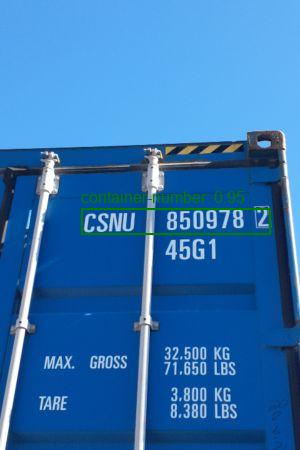


📷 MEDU6579994.jpg (Expected: MEDU6579994)
   Detection 1: container-number (confidence: 0.950)
   Bounding box: [84, 249, 251, 276]
   Inference time: 0.056s
   ⚠️ Annotated image not found: ../results/sample_images/annotated_MEDU6579994.jpg


In [5]:
# Display successful detection examples
def display_detection_results(image_data, title, max_images=6):
    """Display detection results with metadata."""
    print(f"\n{title}")
    print("=" * len(title))
    
    for i, img in enumerate(image_data[:max_images]):
        print(f"\n📷 {img['filename']} (Expected: {img['expected_code']})")
        
        if img['num_detections'] > 0:
            for j, det in enumerate(img['detections']):
                print(f"   Detection {j+1}: {det['class']} (confidence: {det['confidence']:.3f})")
                print(f"   Bounding box: {det['bbox']}")
        else:
            print("   No detections")
        
        print(f"   Inference time: {img['inference_time']:.3f}s")
        
        # Display annotated image if available
        annotated_path = SAMPLE_IMAGES_DIR / f"annotated_{img['filename']}"
        if annotated_path.exists():
            print(f"   📸 Annotated image:")
            display(IPImage(str(annotated_path), width=400))
        else:
            print(f"   ⚠️ Annotated image not found: {annotated_path}")

# Show successful cases
if successful_images:
    # Sort by confidence (highest first)
    sorted_success = sorted(successful_images, 
                          key=lambda x: max([d['confidence'] for d in x['detections']]), 
                          reverse=True)
    display_detection_results(sorted_success, "🎯 TOP SUCCESSFUL DETECTIONS (Highest Confidence)", max_images=3)



❌ FAILURE CASES ANALYSIS

📷 ECMU6635958.jpg (Expected: ECMU6635958)
   Inference time: 0.926s
   Status: No detections found
   📸 Original image:


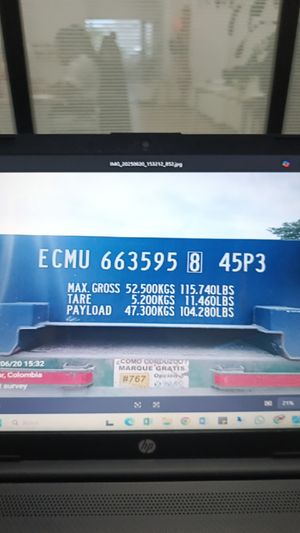

   📸 Annotated image (no detections):


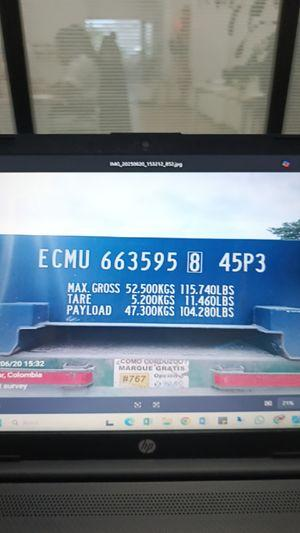


📷 HLBU3679060.jpg (Expected: HLBU3679060)
   Inference time: 0.080s
   Status: No detections found
   📸 Original image:


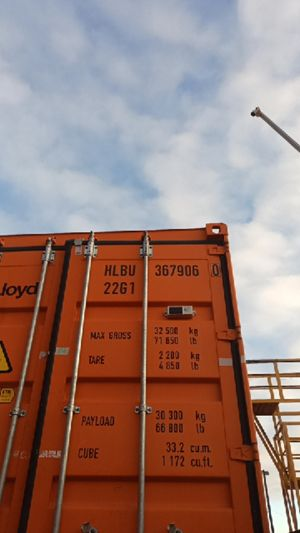

   📸 Annotated image (no detections):


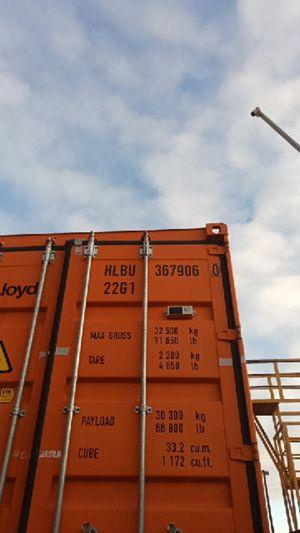


📷 OOCU7513794.jpg (Expected: OOCU7513794)
   Inference time: 0.091s
   Status: No detections found
   📸 Original image:


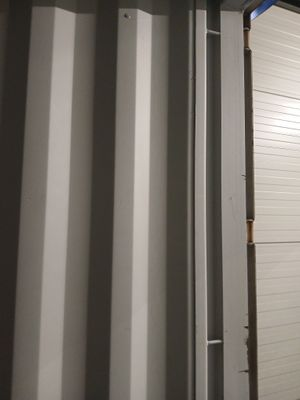

   📸 Annotated image (no detections):


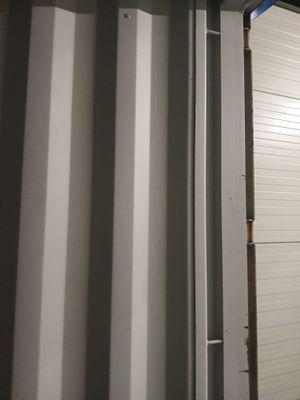


📷 MSKU3507247.jpg (Expected: MSKU3507247)
   Inference time: 0.058s
   Status: No detections found
   📸 Original image:


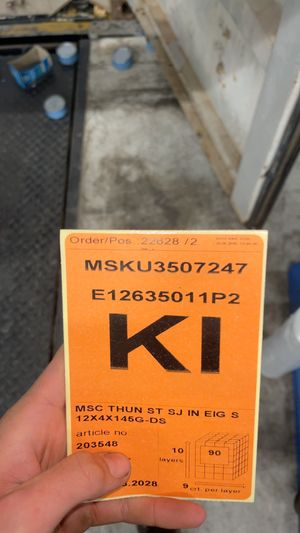

   📸 Annotated image (no detections):


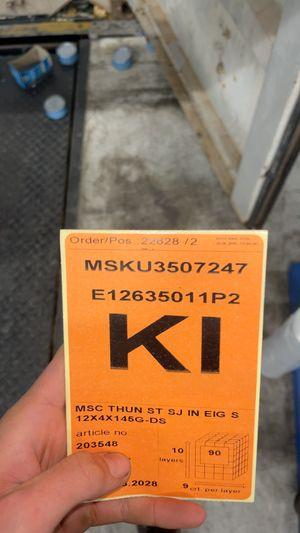


📷 HLBU4128951.jpg (Expected: HLBU4128951)
   Inference time: 0.060s
   Status: No detections found
   📸 Original image:


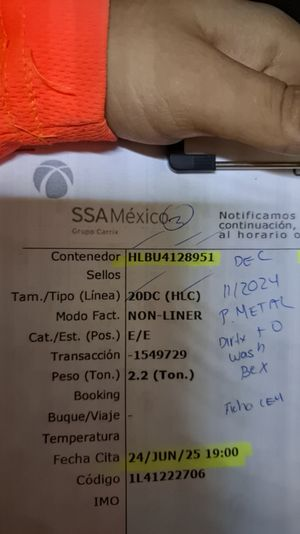

In [6]:
# Show failure cases
if failed_images:
    print(f"\n❌ FAILURE CASES ANALYSIS")
    print("=" * 30)
    
    # Show some failed images (original images from the dataset)
    input_dir = Path("../training_data/00_raw/container_code_tbd")
    
    for i, img in enumerate(failed_images[:5]):  # Show first 5 failures
        print(f"\n📷 {img['filename']} (Expected: {img['expected_code']})")
        print(f"   Inference time: {img['inference_time']:.3f}s")
        print(f"   Status: No detections found")
        
        # Try to display the original image
        original_path = input_dir / img['filename']
        if original_path.exists():
            print(f"   📸 Original image:")
            display(IPImage(str(original_path), width=400))
        else:
            print(f"   ⚠️ Original image not found: {original_path}")
            
        # Also check if there's an annotated version (should be empty)
        annotated_path = SAMPLE_IMAGES_DIR / f"annotated_{img['filename']}"
        if annotated_path.exists():
            print(f"   📸 Annotated image (no detections):")
            display(IPImage(str(annotated_path), width=400))
else:
    print("🎉 No failure cases found!")


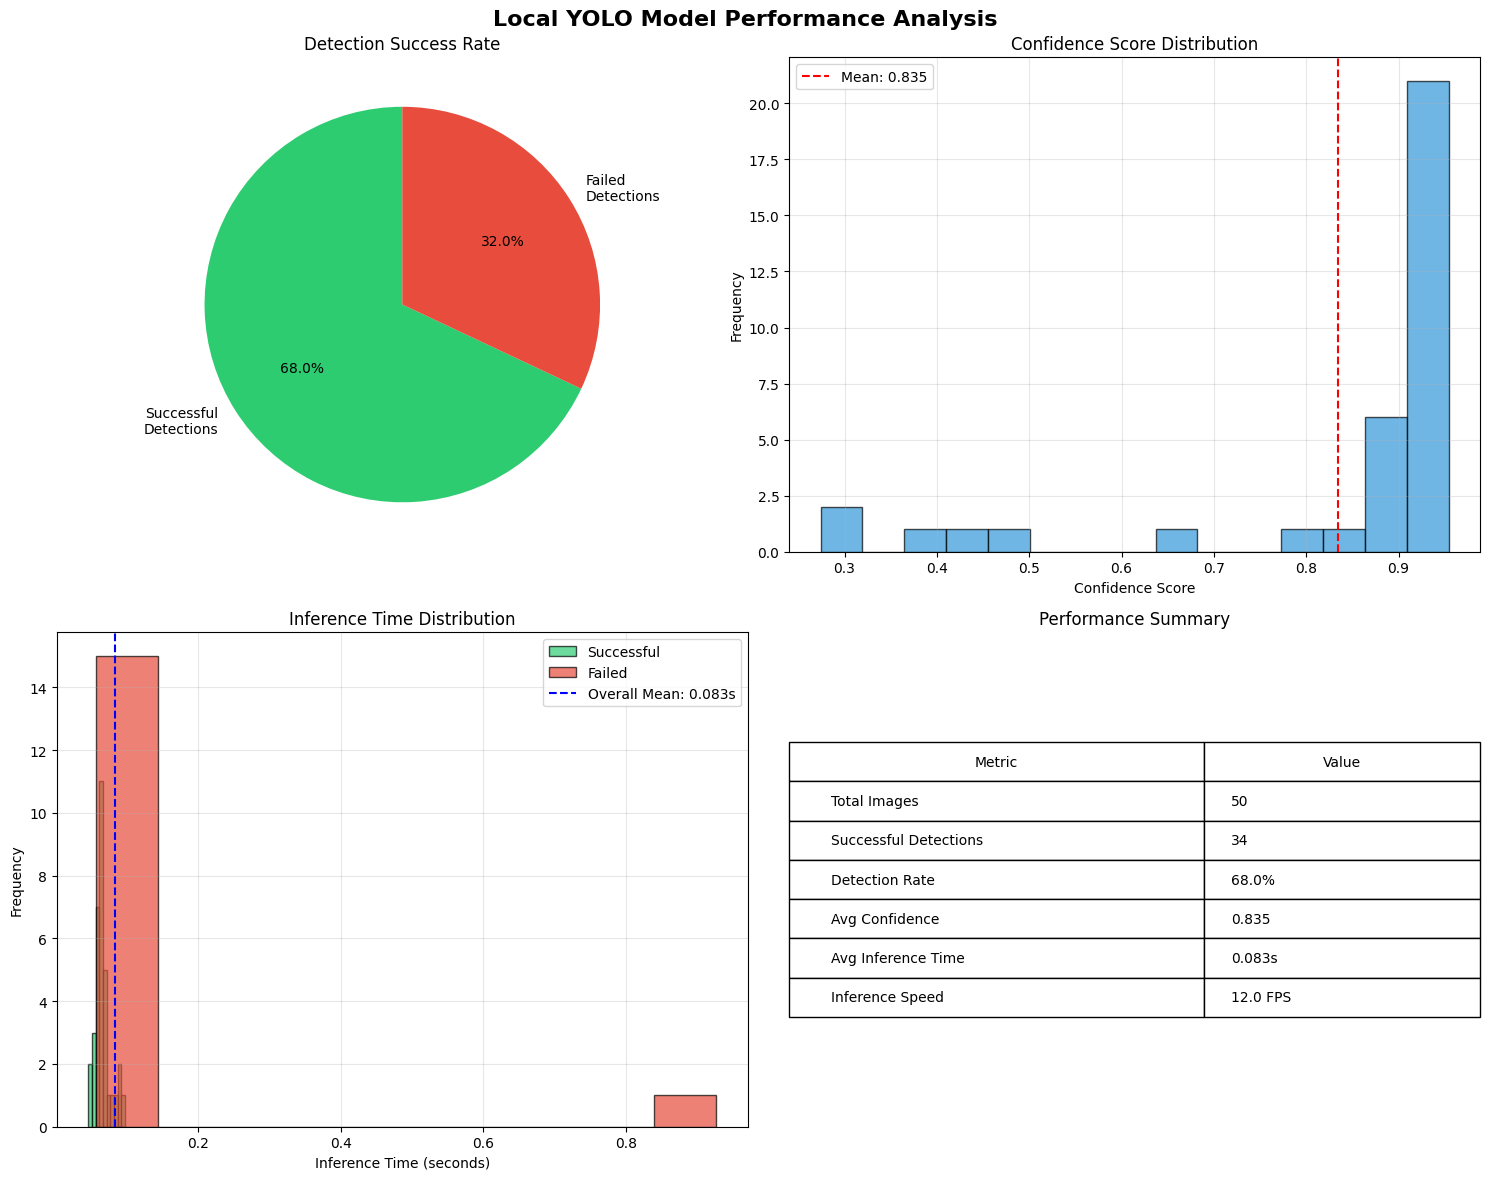

In [7]:
# Create performance visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Local YOLO Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Detection Success Rate
detection_counts = [len(successful_images), len(failed_images)]
detection_labels = ['Successful\nDetections', 'Failed\nDetections']
colors = ['#2ecc71', '#e74c3c']

axes[0,0].pie(detection_counts, labels=detection_labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Detection Success Rate')

# 2. Confidence Distribution (for successful detections only)
if successful_images:
    all_confidences = []
    for img in successful_images:
        for det in img['detections']:
            all_confidences.append(det['confidence'])
    
    axes[0,1].hist(all_confidences, bins=15, color='#3498db', alpha=0.7, edgecolor='black')
    axes[0,1].axvline(np.mean(all_confidences), color='red', linestyle='--', 
                     label=f'Mean: {np.mean(all_confidences):.3f}')
    axes[0,1].set_xlabel('Confidence Score')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].set_title('Confidence Score Distribution')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

# 3. Inference Time Distribution
all_times = [img['inference_time'] for img in results['images']]
success_times = [img['inference_time'] for img in successful_images] if successful_images else []
fail_times = [img['inference_time'] for img in failed_images] if failed_images else []

axes[1,0].hist(success_times, bins=10, alpha=0.7, label='Successful', color='#2ecc71', edgecolor='black')
axes[1,0].hist(fail_times, bins=10, alpha=0.7, label='Failed', color='#e74c3c', edgecolor='black')
axes[1,0].axvline(np.mean(all_times), color='blue', linestyle='--', 
                 label=f'Overall Mean: {np.mean(all_times):.3f}s')
axes[1,0].set_xlabel('Inference Time (seconds)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Inference Time Distribution')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Performance Summary Table
summary_data = [
    ['Total Images', results['summary']['total_images']],
    ['Successful Detections', len(successful_images)],
    ['Detection Rate', f"{performance['detection_rate']:.1%}"],
    ['Avg Confidence', f"{performance['confidence_stats']['mean']:.3f}"],
    ['Avg Inference Time', f"{performance['timing_stats']['avg_inference_time']:.3f}s"],
    ['Inference Speed', f"{1/performance['timing_stats']['avg_inference_time']:.1f} FPS"],
]

axes[1,1].axis('tight')
axes[1,1].axis('off')
table = axes[1,1].table(cellText=summary_data, 
                       colLabels=['Metric', 'Value'],
                       cellLoc='left',
                       loc='center',
                       colWidths=[0.6, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
axes[1,1].set_title('Performance Summary')

plt.tight_layout()
plt.show()


In [8]:
# Analyze patterns in successful vs failed cases
print("🔍 PATTERN ANALYSIS")
print("=" * 50)

# Container code prefix analysis
def analyze_container_prefixes(image_list, category_name):
    """Analyze container code prefixes to find patterns."""
    prefixes = {}
    for img in image_list:
        code = img['expected_code']
        if len(code) >= 4:
            prefix = code[:4]  # First 4 characters (owner code)
            prefixes[prefix] = prefixes.get(prefix, 0) + 1
    
    print(f"\n📊 {category_name} Container Owner Codes:")
    sorted_prefixes = sorted(prefixes.items(), key=lambda x: x[1], reverse=True)
    for prefix, count in sorted_prefixes[:10]:  # Top 10
        print(f"   {prefix}: {count} images")
    
    return prefixes

if successful_images:
    success_prefixes = analyze_container_prefixes(successful_images, "SUCCESSFUL")

if failed_images:
    fail_prefixes = analyze_container_prefixes(failed_images, "FAILED")

# Find owner codes that appear in both success and failure
if successful_images and failed_images:
    common_prefixes = set(success_prefixes.keys()) & set(fail_prefixes.keys())
    if common_prefixes:
        print(f"\n⚖️ Owner codes appearing in both success and failure:")
        for prefix in common_prefixes:
            success_count = success_prefixes.get(prefix, 0)
            fail_count = fail_prefixes.get(prefix, 0)
            total = success_count + fail_count
            success_rate = success_count / total if total > 0 else 0
            print(f"   {prefix}: {success_count}✅/{fail_count}❌ (success rate: {success_rate:.1%})")

# Performance insights
print(f"\n💡 KEY INSIGHTS:")
print(f"   • Detection rate: {performance['detection_rate']:.1%} - {'Good' if performance['detection_rate'] > 0.6 else 'Needs improvement'}")
print(f"   • Confidence when detecting: {performance['confidence_stats']['mean']:.3f} - {'High confidence' if performance['confidence_stats']['mean'] > 0.8 else 'Moderate confidence'}")
print(f"   • Speed: {1/performance['timing_stats']['avg_inference_time']:.1f} FPS - {'Real-time capable' if 1/performance['timing_stats']['avg_inference_time'] > 10 else 'May need optimization'}")

# Recommendations
print(f"\n🎯 RECOMMENDATIONS:")
if performance['detection_rate'] < 0.7:
    print("   • Consider fine-tuning the model on more Cargosnap container images")
    print("   • Try different confidence thresholds (current: {:.2f})".format(results['model_info']['confidence_threshold']))

if failed_images:
    print("   • Analyze failure cases for common patterns (lighting, angle, image quality)")
    print("   • Consider data augmentation for underrepresented container types")

print("   • Model is ready for mobile integration testing")
print("   • Consider A/B testing with different confidence thresholds in production")


🔍 PATTERN ANALYSIS

📊 SUCCESSFUL Container Owner Codes:
   TCLU: 3 images
   TRHU: 3 images
   OOCU: 3 images
   MSMU: 2 images
   BSIU: 2 images
   MRKU: 2 images
   CSNU: 1 images
   TGHU: 1 images
   ENLU: 1 images
   MEDU: 1 images

📊 FAILED Container Owner Codes:
   HLBU: 4 images
   ECMU: 1 images
   OOCU: 1 images
   MSKU: 1 images
   CCLU: 1 images
   TLLU: 1 images
   NYKU: 1 images
   CICU: 1 images
   MSDU: 1 images
   SEGU: 1 images

⚖️ Owner codes appearing in both success and failure:
   MSKU: 1✅/1❌ (success rate: 50.0%)
   MSDU: 1✅/1❌ (success rate: 50.0%)
   OOCU: 3✅/1❌ (success rate: 75.0%)

💡 KEY INSIGHTS:
   • Detection rate: 68.0% - Good
   • Confidence when detecting: 0.835 - High confidence
   • Speed: 12.0 FPS - Real-time capable

🎯 RECOMMENDATIONS:
   • Consider fine-tuning the model on more Cargosnap container images
   • Try different confidence thresholds (current: 0.25)
   • Analyze failure cases for common patterns (lighting, angle, image quality)
   • Cons